## Testing CCNOT (Toffoli) gate using IBMQ

#### Load libraries

In [1]:
!pip install qiskit
import qiskit as qk
from qiskit import IBMQ,Aer

#### Qconfig_IBMQ_experience.py is file where you put the credentials in the form: 
#### APItoken = '' 
#### To get the token register at https://quantum-computing.ibm.com/account 

In [31]:
import Qconfig_IBMQ_experience
IBMQ.save_account(Qconfig_IBMQ_experience.APItoken, overwrite=True)
IBMQ.load_account()

ibmqfactory.load_account:WARNING:2020-09-04 12:10:27,824: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

####   Alternatively you can insert token directly:             

In [4]:
#IBMQ.enable_account("your token here")

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

#### See which backends are available

In [32]:
my_provider = IBMQ.get_provider()
my_provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_valencia') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_london') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_burlington') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_essex') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>]

#### Choose the backend you like

#### Check which backend is less buisy

In [42]:
provider = IBMQ.get_provider(hub='ibm-q')
provider.backends()

from qiskit.providers.ibmq import least_busy

small_devices = provider.backends(filters=lambda x: x.configuration().n_qubits == 5
                                   and not x.configuration().simulator)
least_busy(small_devices)

<IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>

In [34]:
my_provider = IBMQ.get_provider()
#backend  = my_provider.get_backend('ibmq_ourense')
#backend  = my_provider.get_backend('ibmq_qasm_simulator')
backend=Aer.get_backend('qasm_simulator')

### Let's now write the code for simplest gates

#### Create 2 Qbits and 2 classical measurement gates

In [74]:
qr=qk.QuantumRegister(2)
cr=qk.ClassicalRegister(2)
qc=qk.QuantumCircuit(qr,cr)


### Prepare the state of  Qbits
#### Initially all Qbits are in |0> state


In [75]:
qc.x(qr[0])
#qc.x(qr[1])

#### Create measurement gates in computational basis

In [76]:
measureZ=qk.QuantumCircuit(qr,cr)
measureZ.measure(qr,cr)
testZ=qc+measureZ

#### Create measurement gates in superposition basis

In [77]:
measureX=qk.QuantumCircuit(qr,cr)
measureX.h(qr)
measureX.measure(qr,cr)
testX=qc+measureX

#### Run the jobs

Choose the local simulator

In [79]:
backend=Aer.get_backend('qasm_simulator')
jobIBM=qk.execute([testZ,testX],backend=backend,shots=1024)
resultSim=jobIBM.result()

Coose the cloud backend

In [58]:
backend  = my_provider.get_backend('ibmq_ourense')
jobIBM=qk.execute([testZ,testX],backend=backend,shots=1024)
resultExp=jobIBM.result()

#### Plot results as histograms

Computational basis

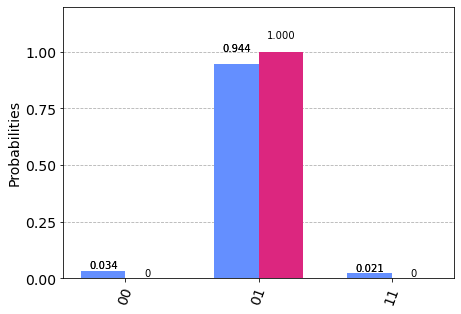

In [59]:
from qiskit.tools.visualization import plot_histogram
plot_histogram([resultExp.get_counts(testZ),resultSim.get_counts(testZ)]) 

Superposition basis

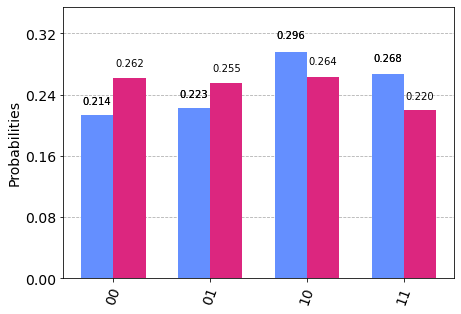

In [60]:
from qiskit.tools.visualization import plot_histogram
plot_histogram([resultExp.get_counts(testX),resultSim.get_counts(testX)]) 

####  Check what happens if we apply several times

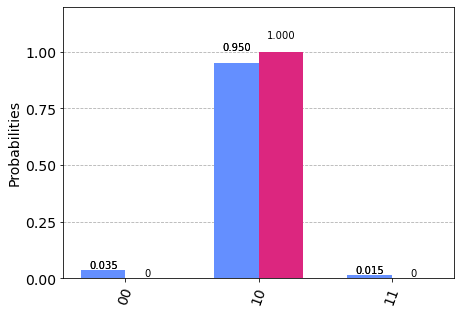

In [91]:
qr=qk.QuantumRegister(2)
cr=qk.ClassicalRegister(2)
qc=qk.QuantumCircuit(qr,cr)

qc.x(qr[0])
qc.x(qr[1])
qc.x(qr[0])
qc.x(qr[1])
qc.x(qr[0])
qc.x(qr[1])
qc.x(qr[0])
qc.x(qr[1])
qc.x(qr[0])
qc.x(qr[1])
qc.x(qr[0])

measureZ=qk.QuantumCircuit(qr,cr)
measureZ.measure(qr,cr)
testZ=qc+measureZ

#qc.x(qr[0])

backend  = my_provider.get_backend('ibmq_ourense')
jobIBM=qk.execute([testZ],backend=backend,shots=1024)
resultExpMulty=jobIBM.result()


backend=Aer.get_backend('qasm_simulator')
jobIBM=qk.execute([testZ],backend=backend,shots=1024)
resultSimMulty=jobIBM.result()

from qiskit.tools.visualization import plot_histogram
plot_histogram([resultExpMulty.get_counts(testZ),resultSimMulty.get_counts(testZ)]) 

###  Let's check CNOT gate
####  Let's choose Qbits 0 as controlling one and Qbit 1 as the target one. 

In [94]:
qr=qk.QuantumRegister(2)
cr=qk.ClassicalRegister(2)
qc=qk.QuantumCircuit(qr,cr)

qc.h(qr[0])
qc.cx(qr[0],qr[1])

measureZ=qk.QuantumCircuit(qr,cr)
measureZ.measure(qr,cr)
testZ=qc+measureZ

backend=Aer.get_backend('qasm_simulator')
jobIBM=qk.execute([testZ,testX],backend=backend,shots=1024)
resultSimCNOT=jobIBM.result()

backend  = my_provider.get_backend('ibmq_ourense')
jobIBM=qk.execute([testZ,testX],backend=backend,shots=1024)
resultExpCNOT=jobIBM.result()

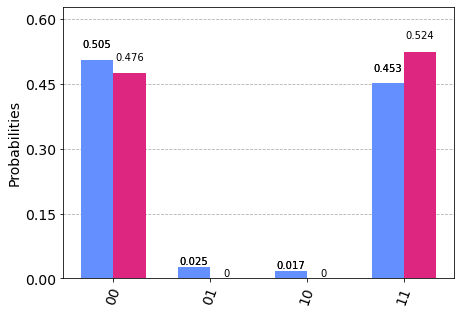

In [95]:
from qiskit.tools.visualization import plot_histogram
plot_histogram([resultExpCNOT.get_counts(testZ),resultSimCNOT.get_counts(testZ)])

Plot results as histogram